In [1]:
# random walk RL problem implementation
# inspired by: https://medium.com/@violante.andre/simple-reinforcement-learning-temporal-difference-learning-e883ea0d65b0

### PARAMETERS ###
# environment
N_states = 7
state_reward = N_states - 1
state_start = int(N_states/2)

# episodes
N_episodes = 250

# hyperparameters
gamma = 1.                 # discount rate, none in this case
alpha = .1                 # learning rate

In [2]:
### INITIALIZATION ###
import numpy as np
def initialize_values(N_states,state_reward):
    
    values = np.zeros((N_states,))              # initial guess of state values
    values_gt = np.zeros((N_states,))           # ground truth state values
    
    state_reward = N_states - 1                 # reward given in highest state
    for s in range(0,N_states):
        values[s] = round(1 / N_states,2)
        
        # probabilities for each state to gain a reward with respect to ending in the reward state
        N_states_other = N_states - 1                       # number of other possible states
        N_states_toreward = state_reward - s                # number of states separating current state and reward state
        prob = 1 - N_states_toreward / N_states_other       # probability of reward is higher the closer the agent gets
        values_gt[s] = round( prob, 2 )
    
    return values,values_gt

values,values_gt = initialize_values(N_states,state_reward)

import pandas as pd
epdf = pd.DataFrame()           # create structure to store training data

In [3]:
### TRAINING LOOP ###
for e in range (0,N_episodes):
    
    state = state_start
    
    # end episode if in one of the terminal states
    while (state != state_reward) and (state != 0):
        move = np.random.choice([-1,1])
        
        # take action
        state_new = state + move
        
        # observe reward in the state
        if state_new == state_reward:
            reward = 1.0
        else:
            reward = 0.0
        
        # update value estimate for this timestep by scaling prediction error
        values[state] = values[state] + alpha * ( reward + gamma*values[state_new]-values[state])
        
        state = state_new
    
    epdf[e] = values

epdf.iloc[-1,:] = 0.
epdf.iloc[0,:] = 0.

C:\Users\Kathryn\AppData\Local\Temp\ipykernel_13232\2887121024.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  epdf[e] = values
C:\Users\Kathryn\AppData\Local\Temp\ipykernel_13232\2887121024.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  epdf[e] = values
C:\Users\Kathryn\AppData\Local\Temp\ipykernel_13232\2887121024.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

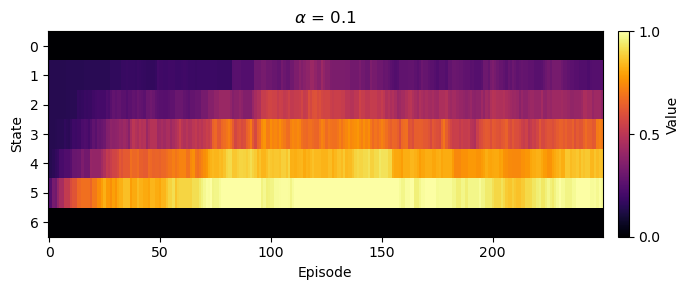

In [4]:
### DATA VISUALIZATION ###
import matplotlib.pyplot as plt
fig,(ax,cax) = plt.subplots(1,2,figsize=(7,3),gridspec_kw={'width_ratios':[50,1]})
ax.set_title(r'$\alpha$ = {}'.format(alpha))
im = ax.imshow(epdf,aspect='auto',interpolation='none',vmin=0.,vmax=1.,cmap='inferno')
ax.set_xlabel('Episode')
ax.set_ylabel('State')

ticks = [0,0.5,1]
cbar = fig.colorbar(im, cax=cax,ticks=ticks,orientation='vertical')  
cbar.set_label('Value',va='top',ha='left',rotation=90,in_layout=True)

fig.tight_layout()
plt.show()